In [6]:
import tweepy
from textblob import TextBlob
import csv
import re
import sys
import pandas as pd

consumer_key='xxxxxxxxxxxxxxx'
consumer_secret='xxxxxxxxxxxxxxxxxxxxxxxxxxxxY'

access_token_key='xxxxxxxxxxxxxxxxxxx'
access_token_secret='xxxxxxxxxxxxxxxxxxxxxx'

auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token_key,access_token_secret)

api=tweepy.API(auth)
topic_name=input("Enter the topic name: ")
pubic_tweets=api.search(topic_name,count=1000)
unwanted_words=['@','RT',':','https','http']
symbols=['@','#']
data=[]
for tweet in pubic_tweets:
    text=tweet.text
    textWords=text.split()
    #print (textWords)
    cleaning_Tweet=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(RT)", " ", text).split())
    print (cleaning_Tweet)
    #print (TextBlob(cleanedTweet).tags)
    analysis= TextBlob(cleaning_Tweet)
    print (analysis.sentiment)
    polarity = 'Positive'
    if(analysis.sentiment.polarity < 0):
        polarity = 'Negative'
    if(0<=analysis.sentiment.polarity <=0.2):
        polarity = 'Neutral'
    #print (polarity)
    dic={}
    dic['Sentiment']=polarity
    dic['Tweet']=cleaning_Tweet
    dic['Polarity']=analysis.sentiment.polarity
    data.append(dic)
df=pd.DataFrame(data)
df
#df.to_csv('Virgin America.csv')

Enter the topic name: Virgin America
The nations of the Americas all trace their faith to the coming of the Virgin at Guadalupe Happy feast day of Our Lady
Sentiment(polarity=0.8, subjectivity=1.0)
Ma anitas Eucharistic celebration in honor of the Virgin of Guadalupe and tamales at breakfast with NorthAmerican
Sentiment(polarity=0.0, subjectivity=0.0)
Love and devotion to the Virgin of Guadalupe reach far beyond the borders of Mexico extending to the United States
Sentiment(polarity=0.3, subjectivity=0.8)
The nations of the Americas all trace their faith to the coming of the Virgin at Guadalupe Happy feast day of Our Lady
Sentiment(polarity=0.8, subjectivity=1.0)
Give them voting rights D C Puerto Rico Virgin Islands America Samoa Northern Mariana Islands Guam
Sentiment(polarity=0.0, subjectivity=0.0)
The nations of the Americas all trace their faith to the coming of the Virgin at Guadalupe Happy feast day of Our Lady
Sentiment(polarity=0.8, subjectivity=1.0)
The NHS was sold away priv

,Sentiment,Tweet,Polarity
0,Positive,The nations of the Americas all trace their fa...,0.800000
1,Neutral,Ma anitas Eucharistic celebration in honor of ...,0.000000
2,Positive,Love and devotion to the Virgin of Guadalupe r...,0.300000
3,Positive,The nations of the Americas all trace their fa...,0.800000
4,Neutral,Give them voting rights D C Puerto Rico Virgin...,0.000000
...,...,...,...
95,Neutral,Today I learned that Arizona and Hawaii don t ...,0.000000
96,Neutral,Evangelism in America holds that Judaism was t...,0.000000
97,Neutral,Virgin Atlantic Bargains and Current Availabil...,0.068182
98,Negative,Latin America economy will fall never recoveri...,-0.250000


In [7]:
New = [];
for x in df['Polarity']:
    if x <0 :
        value = "Negative"
    elif (x>=0 and x<0.2):
        value = "Neutral"
    else :
        value = "Positive"
    
    New.append(value)
        

New
df['Sentiment_compare'] = New
df.head(10)

,Sentiment,Tweet,Polarity,Sentiment_compare
0,Positive,The nations of the Americas all trace their fa...,0.8,Positive
1,Neutral,Ma anitas Eucharistic celebration in honor of ...,0.0,Neutral
2,Positive,Love and devotion to the Virgin of Guadalupe r...,0.3,Positive
3,Positive,The nations of the Americas all trace their fa...,0.8,Positive
4,Neutral,Give them voting rights D C Puerto Rico Virgin...,0.0,Neutral
5,Positive,The nations of the Americas all trace their fa...,0.8,Positive
6,Neutral,The NHS was sold away privatised under Labour ...,0.0,Neutral
7,Neutral,Can t believe people buy into this and besides...,0.0,Neutral
8,Positive,The nations of the Americas all trace their fa...,0.8,Positive
9,Neutral,Fact The Virgin de Guadalupe was revealed to a...,0.0,Neutral


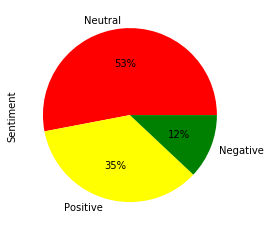

In [8]:
df.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

In [10]:
V0 = df[(df['Polarity']>0) & (df['Polarity']<0.2)]
Neutral = V0.groupby('Polarity', as_index=False).agg({"Sentiment":"count"})
Neutral

,Polarity,Sentiment
0,0.023611,1
1,0.025000,1
2,0.068182,1
3,0.133333,1
4,0.200000,3


In [11]:
V1 = df[(df['Polarity']>=0.2)]
Positive = V1.groupby('Polarity', as_index=False).agg({"Tweet":"count"})
Positive

,Polarity,Tweet
0,0.200000,4
1,0.212500,1
2,0.250000,4
3,0.300000,6
4,0.350000,2
5,0.428571,3
6,0.466667,1
7,0.500000,1
8,0.687500,1
9,0.700000,2


In [12]:
V2 = df[(df['Polarity']<0)]
Negative = V2.groupby('Polarity', as_index=False).agg({"Tweet":"count"})
Negative

,Polarity,Tweet
0,-0.800000,1
1,-0.500000,2
2,-0.296296,1
3,-0.250000,1
4,-0.200000,1
5,-0.133333,1
6,-0.127778,1
7,-0.062500,1
8,-0.050000,1
9,-0.028333,1
